In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [56]:
df=pd.read_csv("weight_height_data.csv")
df.shape

(100, 2)

Text(0, 0.5, 'Height')

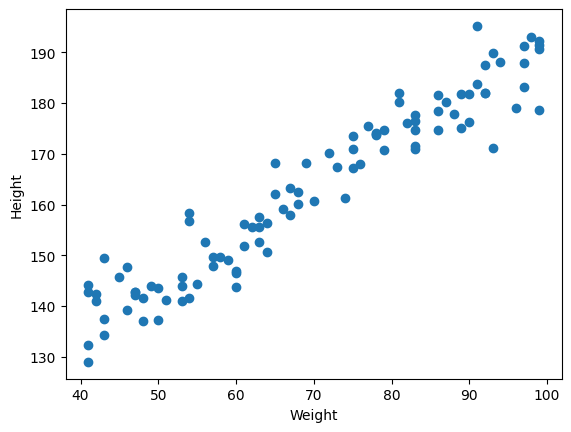

In [41]:
plt.scatter(df['Weight_kg'],df['Height_cm'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [42]:
df.corr()

,Weight_kg,Height_cm
Weight_kg,1.000000,0.958656
Height_cm,0.958656,1.000000


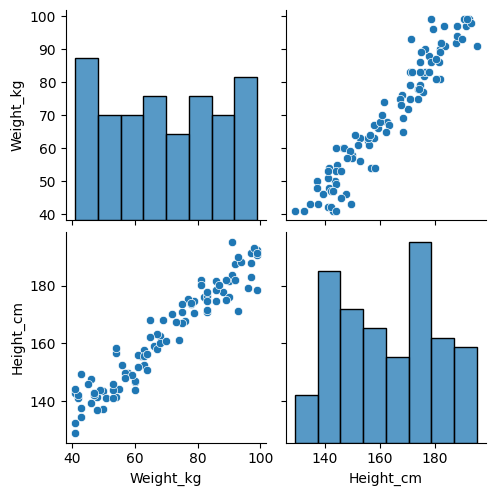

In [43]:
import seaborn as sns
sns.pairplot(df)

In [44]:
X=df[['Weight_kg']]
y=df['Height_cm']

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.25, random_state=42)

In [47]:
X_train.shape

(75, 1)

In [48]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [49]:
X_test=scaler.fit_transform(X_test)

In [50]:
from sklearn.linear_model import LinearRegression


In [51]:
regression=LinearRegression(n_jobs=-1)


In [52]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [54]:
print("regression coeff:",regression.coef_)
print("regression intercept:",regression.intercept_)

regression coeff: [16.62929278]
regression intercept: 163.80933333333334


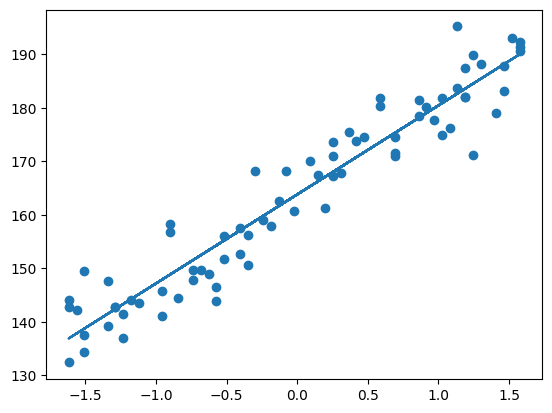

In [57]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

In [69]:
y_pred=regression.predict(X_test)
print(y_pred)

[142.16602618 156.81627922 194.90693712 179.28000054 186.11678529
 163.65306397 159.74632982 175.3732664  158.76964629 174.39658286
 139.23597557 148.02612739 144.11939325 179.28000054 161.6996969
 178.30331701 149.97949447 152.90954507 147.04944386 192.95357004
 174.39658286 164.6297475  138.25929203 150.956178   182.21005115]


In [71]:
y_test

83    145.8
53    147.0
70    178.6
45    177.7
44    181.7
39    163.2
22    155.5
80    170.7
10    155.6
0     174.1
18    141.1
30    141.2
73    142.2
33    176.4
90    162.1
4     176.1
76    143.9
77    152.7
12    137.2
31    191.2
55    174.0
88    160.1
26    129.0
42    141.5
69    174.6
Name: Height_cm, dtype: float64

In [64]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("Mean absolute error",mean_absolute_error(y_test,y_pred))


MSE: 36.22374064337541
R² Score: 0.869517608781772
Mean absolute error 4.553197441758301


In [67]:
weights = [[55], [65], [75]]
predicted_heights = regression.predict(scaler.transform(weights))

print(predicted_heights)


[151.93286154 161.6996969  171.46653225]


e:\UDEMY\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
